In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
dataframe = pd.read_csv('1802315.CSV')

# preprocessing

In [2]:
#####Printing number of rows and columns in the dataset#####
dataframe.shape

(50000, 19)

In [3]:
#####Checking number of unique values in the dataset######
dataframe.nunique()

business_code                 6
cust_number                1446
name_customer              4339
clear_date                  399
buisness_year                 2
doc_id                    50000
posting_date                503
document_create_date        503
document_create_date.1      505
due_in_date                 545
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45109
baseline_create_date        505
cust_payment_terms           74
invoice_id                49992
isOpen                        2
dtype: int64

In [4]:
####Data types of data items####

dataframe.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [5]:
#####Number of unique clear_date#####

dataframe.clear_date.nunique()

399

In [6]:
####Printing the dataframe#####

dataframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200974851,RESTA corporation,2019-08-28 00:00:00,2019.0,1.929725e+09,2019-08-08,20190808,20190808,20190828.0,USD,RV,1.0,NaN,86.48,20190808.0,NAD1,1.929725e+09,0
1,U001,0200833713,JETRO corporation,2019-01-29 00:00:00,2019.0,1.928598e+09,2019-01-09,20190109,20190109,20190129.0,USD,RV,1.0,NaN,10034.85,20190109.0,NAD1,1.928598e+09,0
2,U001,0200793568,SUPE us,2019-04-01 00:00:00,2019.0,1.928977e+09,2019-03-16,20190316,20190316,20190331.0,USD,RV,1.0,NaN,110101.25,20190316.0,NAA8,1.928977e+09,0
3,U001,0200920735,ALBERT corporation,2020-04-13 00:00:00,2020.0,1.930488e+09,2020-02-07,20200206,20200207,20200412.0,USD,RV,1.0,NaN,3973.64,20200207.0,NAGD,1.930488e+09,0
4,U001,0200743123,KROGER corporation,2019-05-30 00:00:00,2019.0,1.929318e+09,2019-05-15,20190514,20190515,20190530.0,USD,RV,1.0,NaN,28121.48,20190515.0,NAA8,1.929318e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO foundation,NaN,2020.0,1.930581e+09,2020-03-04,20200229,20200304,20200324.0,USD,RV,1.0,NaN,14152.93,20200304.0,NAD1,1.930581e+09,1
49996,U001,0200759878,SA systems,NaN,2020.0,1.930574e+09,2020-02-28,20200226,20200228,20200314.0,USD,RV,1.0,NaN,14796.78,20200228.0,NAH4,1.930574e+09,1
49997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930788e+09,2020-04-16,20200415,20200416,20200501.0,USD,RV,1.0,NaN,29268.42,20200416.0,NAH4,1.930788e+09,1
49998,U001,0200712105,WALG systems,NaN,2020.0,1.930706e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,NaN,126533.00,20200326.0,NAA8,1.930706e+09,1


In [7]:
######removing the column having all NULL  values i.e  "area_business"######

dataframe.dropna(how="all",inplace=True,axis = 1)

In [8]:
dataframe.shape

(50000, 18)

In [9]:
#######Converting columns into the required datatypes########

dataframe['clear_date']=pd.to_datetime(dataframe['clear_date'])
dataframe['document_create_date']=pd.to_datetime(dataframe['document_create_date'],format ='%Y%m%d')
dataframe['document_create_date.1']=pd.to_datetime(dataframe['document_create_date.1'],format ='%Y%m%d')
dataframe['baseline_create_date']=pd.to_datetime(dataframe['baseline_create_date'],format ='%Y%m%d')
dataframe['due_in_date']=pd.to_datetime(dataframe['due_in_date'],format ='%Y%m%d')
dataframe['buisness_year'] = dataframe['buisness_year'].astype(int)
dataframe['doc_id'] = dataframe['doc_id'].astype(int)
dataframe['posting_date']=pd.to_datetime(dataframe['posting_date'])
dataframe['invoice_currency'] = dataframe['invoice_currency'].astype(str)
dataframe['document type'] = dataframe['document type'].astype(str)


In [10]:
#####Droping rows where 'document_create_date.1' is greater than 'baseline_create_date'#####

dataframe.drop((dataframe[dataframe['document_create_date.1'] > dataframe['baseline_create_date']]).index, inplace=True)

In [11]:
#####Droping rows where 'due_in_date' is less than and equal to 'baseline_create_date'#####

dataframe.drop((dataframe[dataframe['due_in_date'] <= dataframe['baseline_create_date']]).index, inplace=True)

In [12]:
####Droping rows where 'due_in_date' is less than and equal to 'posting_date'#####

dataframe.drop((dataframe[dataframe['due_in_date'] <= dataframe['posting_date']]).index, inplace=True)

In [13]:
#####Droping rows where 'baseline_create_date' is greater than 'clear_date'#####

dataframe.drop((dataframe[dataframe['baseline_create_date'] > dataframe['clear_date']]).index, inplace = True )

In [14]:
####Droping rows where 'clear_date' is less than and equal to 'document_create_date.1'#####

dataframe.drop((dataframe[dataframe['clear_date'] <= dataframe['document_create_date.1']]).index, inplace = True )

In [15]:
#####Droping rows where 'clear_date' is less than and equal to 'baseline_create_date#####

dataframe.drop((dataframe[dataframe['clear_date'] <= dataframe['baseline_create_date']]).index, inplace = True )

In [16]:

[col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

['clear_date']

In [17]:
###We can use the isna() function to understand how many missing values we have in our data.###
dataframe.apply(lambda x: sum(x.isna()/len(dataframe)))

business_code             0.000000
cust_number               0.000000
name_customer             0.000000
clear_date                0.100369
buisness_year             0.000000
doc_id                    0.000000
posting_date              0.000000
document_create_date      0.000000
document_create_date.1    0.000000
due_in_date               0.000000
invoice_currency          0.000000
document type             0.000000
posting_id                0.000000
total_open_amount         0.000000
baseline_create_date      0.000000
cust_payment_terms        0.000000
invoice_id                0.000000
isOpen                    0.000000
dtype: float64

In [18]:
##Printing variance in Dataframe###
print(dataframe.var())

buisness_year        1.714825e-01
doc_id               1.284138e+18
posting_id           0.000000e+00
total_open_amount    1.575686e+09
invoice_id           8.192703e+16
isOpen               9.029697e-02
dtype: float64


In [19]:
####Dropping the columns which are not required for modelling or are constant/quasi constant####
dataframe.drop(['name_customer','posting_id'],inplace=True,axis = 1)

In [20]:
####Checking for duplicated rows#####

dataframe.duplicated().sum()

0

In [21]:
####Printing Types of invoice currency####

print(dataframe.invoice_currency.unique())

['USD' 'CAD']


In [22]:
#converting the open amount into a single currency i.e. USD
#1CAD = 0.78 USD
# so multiplying total amount by 0.78 wherever invoice_currency is CAD

dataframe['currency_coefficient'] = dataframe['invoice_currency'].map({'CAD':0.78, 'USD':1.00})
dataframe['total_open_amount'] = dataframe['total_open_amount']*dataframe['currency_coefficient']

In [23]:
dataframe.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,currency_coefficient
0,U001,0200974851,2019-08-28,2019,1929725303,2019-08-08,2019-08-08,2019-08-08,2019-08-28,USD,RV,86.48,2019-08-08,NAD1,1.929725e+09,0,1.0
1,U001,0200833713,2019-01-29,2019,1928598300,2019-01-09,2019-01-09,2019-01-09,2019-01-29,USD,RV,10034.85,2019-01-09,NAD1,1.928598e+09,0,1.0
2,U001,0200793568,2019-04-01,2019,1928977238,2019-03-16,2019-03-16,2019-03-16,2019-03-31,USD,RV,110101.25,2019-03-16,NAA8,1.928977e+09,0,1.0
3,U001,0200920735,2020-04-13,2020,1930488432,2020-02-07,2020-02-06,2020-02-07,2020-04-12,USD,RV,3973.64,2020-02-07,NAGD,1.930488e+09,0,1.0
4,U001,0200743123,2019-05-30,2019,1929317939,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,RV,28121.48,2019-05-15,NAA8,1.929318e+09,0,1.0


In [24]:
####Dropping unwanted columns####

dataframe.drop(['doc_id','invoice_id','currency_coefficient','isOpen','document_create_date.1'],inplace=True,axis = 1)

In [25]:
dataframe.head()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200974851,2019-08-28,2019,2019-08-08,2019-08-08,2019-08-28,USD,RV,86.48,2019-08-08,NAD1
1,U001,0200833713,2019-01-29,2019,2019-01-09,2019-01-09,2019-01-29,USD,RV,10034.85,2019-01-09,NAD1
2,U001,0200793568,2019-04-01,2019,2019-03-16,2019-03-16,2019-03-31,USD,RV,110101.25,2019-03-16,NAA8
3,U001,0200920735,2020-04-13,2020,2020-02-07,2020-02-06,2020-04-12,USD,RV,3973.64,2020-02-07,NAGD
4,U001,0200743123,2019-05-30,2019,2019-05-15,2019-05-14,2019-05-30,USD,RV,28121.48,2019-05-15,NAA8


In [26]:
####LABEL ENCODING####

l=preprocessing.LabelEncoder()
dataframe['business_code']=l.fit_transform(dataframe['business_code'])
dataframe['cust_number']=l.fit_transform(dataframe['cust_number'])
dataframe['document type']=l.fit_transform(dataframe['document type'])
dataframe['cust_payment_terms']=l.fit_transform(dataframe['cust_payment_terms'])

In [27]:
dataframe

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,1,1008,2019-08-28,2019,2019-08-08,2019-08-08,2019-08-28,USD,0,86.48,2019-08-08,26
1,1,957,2019-01-29,2019,2019-01-09,2019-01-09,2019-01-29,USD,0,10034.85,2019-01-09,26
2,1,923,2019-04-01,2019,2019-03-16,2019-03-16,2019-03-31,USD,0,110101.25,2019-03-16,20
3,1,988,2020-04-13,2020,2020-02-07,2020-02-06,2020-04-12,USD,0,3973.64,2020-02-07,31
4,1,790,2019-05-30,2019,2019-05-15,2019-05-14,2019-05-30,USD,0,28121.48,2019-05-15,20
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,883,NaT,2020,2020-03-04,2020-02-29,2020-03-24,USD,0,14152.93,2020-03-04,26
49996,1,826,NaT,2020,2020-02-28,2020-02-26,2020-03-14,USD,0,14796.78,2020-02-28,32
49997,1,849,NaT,2020,2020-04-16,2020-04-15,2020-05-01,USD,0,29268.42,2020-04-16,32
49998,1,716,NaT,2020,2020-03-26,2020-03-26,2020-04-10,USD,0,126533.00,2020-03-26,20


In [28]:
####count rows where clear_date is less than document_create_date###
(dataframe['document_create_date']>dataframe['clear_date']).value_counts()

False    46887
dtype: int64

In [29]:
###Spliting the data into two parts i.e where clear date is null and where data set is not null #####
x_temp=dataframe[dataframe.clear_date.notnull()].copy()
super_test=dataframe[dataframe.clear_date.isnull()].copy()

In [30]:
x_temp.shape

(42181, 12)

In [31]:
super_test.shape

(4706, 12)

In [32]:
##Calculate the target i.e delay (clear_date- due_in date)#####

x_temp['delay'] = x_temp['clear_date'] - x_temp['due_in_date']


In [33]:
x_temp.dtypes

business_code                     int32
cust_number                       int32
clear_date               datetime64[ns]
buisness_year                     int32
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
document type                     int32
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms                int32
delay                   timedelta64[ns]
dtype: object

In [34]:
###Extracting  number of days from delay datatime format#####

x_temp['delay'] = x_temp['delay'].dt.days


In [35]:
x_temp.shape

(42181, 13)

# Spliting

In [36]:
######Spliting data into 3 parts i.e into train and validation set######

x_validation=x_temp[x_temp['document_create_date'] >='2019-11-18'].copy()
x_train=x_temp[x_temp['document_create_date'] < '2019-11-18'].copy()

x_val, x_test = train_test_split(x_validation,test_size=.50,shuffle=False,random_state=42)
x_val.shape,x_test.shape

((4247, 13), (4247, 13))

In [37]:
x_validation.shape


(8494, 13)

In [38]:
x_train.shape

(33687, 13)

In [39]:
###Printing number of rows and column in train,validation and super_test set######

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)
print(super_test.shape)

(33687, 13)
(8494, 13)
(4247, 13)
(4706, 12)


In [40]:
##Printing train set####
x_train

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,1,1008,2019-08-28,2019,2019-08-08,2019-08-08,2019-08-28,USD,0,86.4800,2019-08-08,26,0
1,1,957,2019-01-29,2019,2019-01-09,2019-01-09,2019-01-29,USD,0,10034.8500,2019-01-09,26,0
2,1,923,2019-04-01,2019,2019-03-16,2019-03-16,2019-03-31,USD,0,110101.2500,2019-03-16,20,1
4,1,790,2019-05-30,2019,2019-05-15,2019-05-14,2019-05-30,USD,0,28121.4800,2019-05-15,20,0
6,1,1255,2019-04-15,2019,2019-03-28,2019-03-28,2019-04-12,USD,0,97845.2300,2019-03-28,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,1,698,2019-11-05,2019,2019-10-21,2019-10-18,2019-11-05,USD,0,72204.6400,2019-10-21,20,0
45062,0,386,2019-06-25,2019,2019-06-04,2019-06-04,2019-06-15,CAD,0,97084.6032,2019-06-05,5,10
45063,1,780,2019-04-16,2019,2019-04-01,2019-03-31,2019-04-16,USD,0,104573.0300,2019-04-01,20,0
45064,1,1309,2019-07-12,2019,2019-06-29,2019-06-29,2019-07-14,USD,0,23329.0400,2019-06-29,33,-2


# EDA

Outlier In Delay
Lower Boundary=  -8.0 
Upper Boundary=  8.0 
Outlier Percentage Present =  9.125181820880458


c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


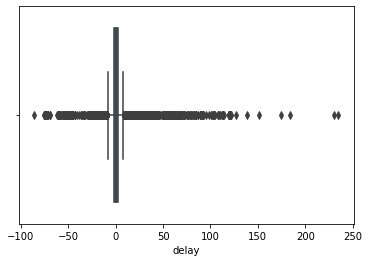

In [41]:
###Checking for outliers####

sns.boxplot(x_train['delay'])
def outlier_boundary(feature,distance):
    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = feature.quantile(0.75) - feature.quantile(0.25)

    lower_boundary = feature.quantile(0.25) - (IQR * distance)
    upper_boundary = feature.quantile(0.75) + (IQR * distance)

    count =0
    for label in feature:
        if label <= lower_boundary or label>= upper_boundary:
            count += 1
    percent_outliers = count * 100/len(feature)
    return upper_boundary, lower_boundary,percent_outliers
"""
looking for outliers,
using the interquantile proximity rule i.e.,
IQR * 1.5, the standard metric

"""
print(f"Outlier In Delay")
upper_boundary, lower_boundary,outlier_percent = outlier_boundary(x_train['delay'], 1.5)
print("Lower Boundary= ",lower_boundary,"\nUpper Boundary= ", upper_boundary,"\nOutlier Percentage Present = ",outlier_percent)

<AxesSubplot:xlabel='cust_payment_terms'>

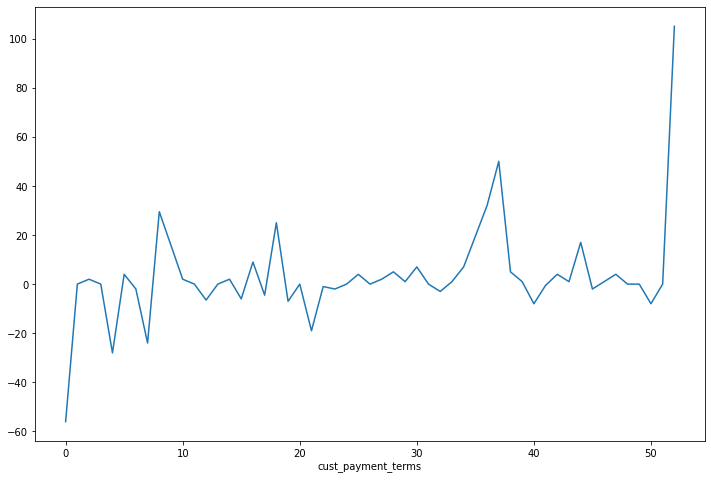

In [42]:
# plot grap between cust_payments_terms and delay using median of both its show how they relatable
plt.figure(figsize = (12,8))
x_train.groupby(['cust_payment_terms'])['delay'].median().plot()

c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

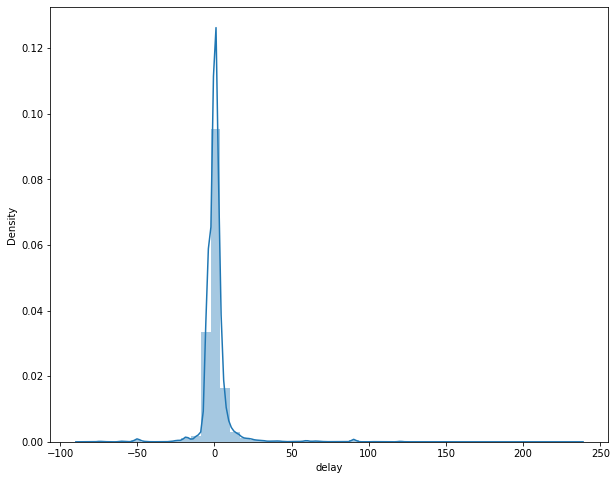

In [43]:
#From the graph below we can see that, delay is between -20 to 20.
plt.figure(figsize = (10,8))
sns.distplot(x_train['delay'])

In [44]:
corr = x_train.corr()

<AxesSubplot:>

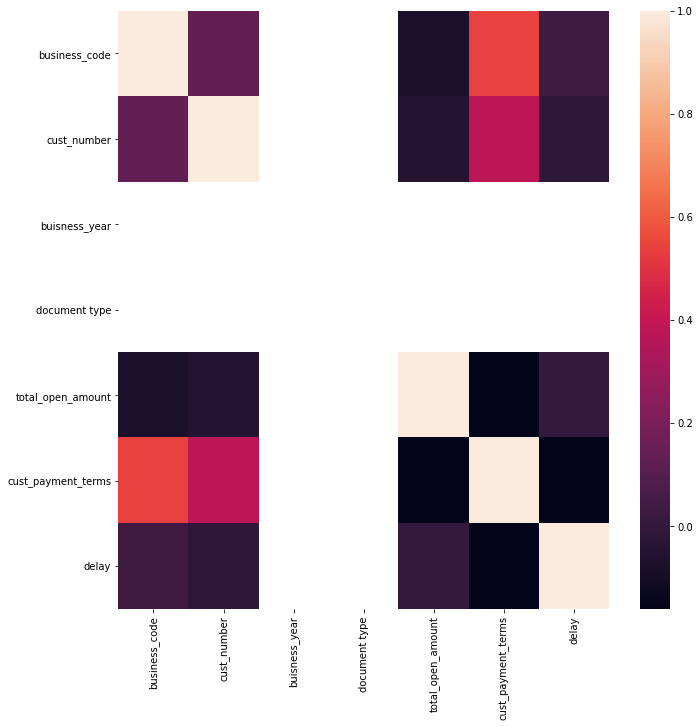

In [45]:
import seaborn as sns
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

# FEATURE ENGINEERING

c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay'>

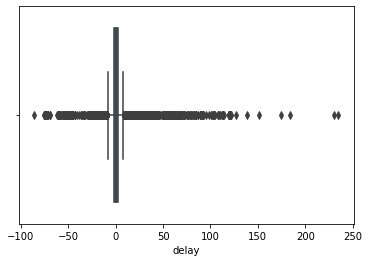

In [46]:
##Box plot of Delay###

sns.boxplot(x_train['delay'])

In [47]:
#####Number of unique year in train set#####

x_train.buisness_year.nunique()

1

In [48]:
#####Number of unique year in dataframe#####

dataframe.buisness_year.nunique()

2

In [49]:
dataframe

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,1,1008,2019-08-28,2019,2019-08-08,2019-08-08,2019-08-28,USD,0,86.48,2019-08-08,26
1,1,957,2019-01-29,2019,2019-01-09,2019-01-09,2019-01-29,USD,0,10034.85,2019-01-09,26
2,1,923,2019-04-01,2019,2019-03-16,2019-03-16,2019-03-31,USD,0,110101.25,2019-03-16,20
3,1,988,2020-04-13,2020,2020-02-07,2020-02-06,2020-04-12,USD,0,3973.64,2020-02-07,31
4,1,790,2019-05-30,2019,2019-05-15,2019-05-14,2019-05-30,USD,0,28121.48,2019-05-15,20
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,883,NaT,2020,2020-03-04,2020-02-29,2020-03-24,USD,0,14152.93,2020-03-04,26
49996,1,826,NaT,2020,2020-02-28,2020-02-26,2020-03-14,USD,0,14796.78,2020-02-28,32
49997,1,849,NaT,2020,2020-04-16,2020-04-15,2020-05-01,USD,0,29268.42,2020-04-16,32
49998,1,716,NaT,2020,2020-03-26,2020-03-26,2020-04-10,USD,0,126533.00,2020-03-26,20


c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='due_in_date', ylabel='delay'>

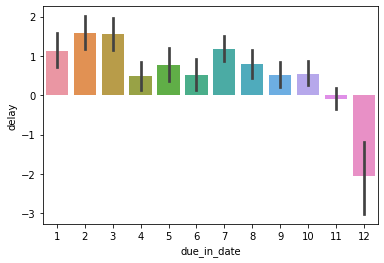

In [50]:
sns.barplot(x_train['due_in_date'].dt.month,x_train['delay'])

In [51]:
#creating a new feature from delay vs month in due date where it seems the value of delay is lower in 12 th months
x_train['_month_due_in_date']=np.where(x_train['due_in_date'].dt.month==12,0,1)
x_validation['_month_due_in_date']=np.where(x_validation['due_in_date'].dt.month==12,0,1)
x_test['_month_due_in_date']=np.where(x_test['due_in_date'].dt.month==12,0,1)
super_test['_month_due_in_date']=np.where(super_test['due_in_date'].dt.month==12,0,1)




<ipython-input-51-f72d6ac91e1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['_month_due_in_date']=np.where(x_test['due_in_date'].dt.month==12,0,1)


In [52]:
#creating a new feature from  delay vs weekday in due date where it seems the value of delay is higher in 4 th and 5th day of week
x_train['_weekday_due_in_date']=np.where(x_train['due_in_date'].dt.weekday/2==2,1,0)
x_validation['_weekday_due_in_date']=np.where(x_validation['due_in_date'].dt.weekday/2==2,1,0)
x_test['_weekday_due_in_date']=np.where(x_test['due_in_date'].dt.weekday/2==2,1,0)
super_test['_weekda_due_in_dae']=np.where(super_test['due_in_date'].dt.weekday/2==2,1,0)



<ipython-input-52-97778a98ec38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['_weekday_due_in_date']=np.where(x_test['due_in_date'].dt.weekday/2==2,1,0)


In [53]:
#creating a new feature from delay vs month in baseline date where it seems the value of delay is lower in 12 th months
x_train['_month_baseline_date']=np.where(x_train['baseline_create_date'].dt.month==12,0,1)
x_validation['_month_baseline_date']=np.where(x_validation['baseline_create_date'].dt.month==12,0,1)
x_test['_month_baseline_date']=np.where(x_test['baseline_create_date'].dt.month==12,0,1)
super_test['_month_baseline_date']=np.where(super_test['baseline_create_date'].dt.month==12,0,1)




<ipython-input-53-3ee4cb048c83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['_month_baseline_date']=np.where(x_test['baseline_create_date'].dt.month==12,0,1)


In [54]:
#creating a new feature from delay vs weekday in baseline  create date where it seems the value of delay is higher in 4 th and 5th day of week
x_train['_weekday_baseline_date']=np.where(x_train['baseline_create_date'].dt.weekday==4,1,0)
x_validation['_weekday_baseline_date']=np.where(x_validation['baseline_create_date'].dt.weekday==4,1,0)
x_test['_weekday_baseline_date']=np.where(x_test['baseline_create_date'].dt.weekday==4,1,0)
super_test['_weekday_baseline_date']=np.where(super_test['baseline_create_date'].dt.weekday==4,1,0)



<ipython-input-54-24379f47f03e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['_weekday_baseline_date']=np.where(x_test['baseline_create_date'].dt.weekday==4,1,0)


In [55]:
####Target encoding cust number as for high cardinality  features label encoding wil not suitable and one hot encoding will add so many columns####

mapper=x_train.groupby('cust_number')['delay'].mean().to_dict()
x_train['mean_delay_customer']=x_train['cust_number'].map(mapper)



In [56]:
#mapping the same dictionary to the validation set and test set
x_validation['mean_delay_customer']=x_validation['cust_number'].map(mapper)
x_test['mean_delay_customer']=x_test['cust_number'].map(mapper)
super_test['mean_delay_customer']=super_test['cust_number'].map(mapper)



<ipython-input-56-490a34d1e38c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['mean_delay_customer']=x_test['cust_number'].map(mapper)


In [57]:
#target encoding cust_payment_terms as for high cardinality  features label encoding wil not suitable and one hot encoding will add so many columns
mapper1=x_train.groupby('cust_payment_terms')['delay'].mean().to_dict()
x_train['mean_delay_terms']=x_train['cust_payment_terms'].map(mapper1)


In [58]:
####Mapping the same dictionary to the validation set#####

x_validation['mean_delay_terms']=x_validation['cust_payment_terms'].map(mapper1)
x_test['mean_delay_terms']=x_test['cust_payment_terms'].map(mapper1)
super_test['mean_delay_terms']=super_test['cust_payment_terms'].map(mapper1)




<ipython-input-58-9ffb8ee0f049>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['mean_delay_terms']=x_test['cust_payment_terms'].map(mapper1)


In [59]:
x_train

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms
0,1,1008,2019-08-28,2019,2019-08-08,2019-08-08,2019-08-28,USD,0,86.4800,2019-08-08,26,0,1,0,1,0,0.660714,0.310245
1,1,957,2019-01-29,2019,2019-01-09,2019-01-09,2019-01-29,USD,0,10034.8500,2019-01-09,26,0,1,0,1,0,0.258065,0.310245
2,1,923,2019-04-01,2019,2019-03-16,2019-03-16,2019-03-31,USD,0,110101.2500,2019-03-16,20,1,1,0,1,0,2.817797,1.418831
4,1,790,2019-05-30,2019,2019-05-15,2019-05-14,2019-05-30,USD,0,28121.4800,2019-05-15,20,0,1,0,1,0,0.883495,1.418831
6,1,1255,2019-04-15,2019,2019-03-28,2019-03-28,2019-04-12,USD,0,97845.2300,2019-03-28,20,3,1,1,1,0,1.666667,1.418831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,1,698,2019-11-05,2019,2019-10-21,2019-10-18,2019-11-05,USD,0,72204.6400,2019-10-21,20,0,1,0,1,0,0.503185,1.418831
45062,0,386,2019-06-25,2019,2019-06-04,2019-06-04,2019-06-15,CAD,0,97084.6032,2019-06-05,5,10,1,0,1,0,-0.692308,6.321872
45063,1,780,2019-04-16,2019,2019-04-01,2019-03-31,2019-04-16,USD,0,104573.0300,2019-04-01,20,0,1,0,1,0,1.127389,1.418831
45064,1,1309,2019-07-12,2019,2019-06-29,2019-06-29,2019-07-14,USD,0,23329.0400,2019-06-29,33,-2,1,0,1,0,0.969697,1.558273


In [60]:
###Converting delay column to int type###

x_test.delay = x_test.delay.astype(int)


c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Feature selection

In [62]:
# feature selection
sfs=SequentialFeatureSelector(RandomForestRegressor(),k_features=6)
x=x_train[['business_code','cust_number','buisness_year','document type','total_open_amount','cust_payment_terms','_month_due_in_date','_month_baseline_date','_weekday_baseline_date','mean_delay_customer','mean_delay_terms']]
y=x_train['delay']
sfs.fit(x,y)
sfs.k_feature_names_

('business_code',
 'buisness_year',
 '_month_due_in_date',
 '_month_baseline_date',
 'mean_delay_customer',
 'mean_delay_terms')

In [63]:
kf=['total_open_amount',
 'cust_payment_terms',
 '_month_due_in_date',
 '_weekday_baseline_date',
 'mean_delay_customer']

In [64]:
y_train=x_train['delay']

# Modelling 

In [65]:
Algorithm = []
RMSE_Score = []

In [66]:
####Random Forest Regressor###

Algorithm.append("Random Forest Regressor")
model_rf = RandomForestRegressor(max_depth=5)


In [67]:
#### fItting our model###

model_rf.fit(x_train[kf],y_train)



RandomForestRegressor(max_depth=5)

In [68]:
###Checking null columns####
[col for col in x_validation.columns if x_validation[col].isnull().sum() > 0]

['mean_delay_customer', 'mean_delay_terms']

In [69]:
x_validation=x_validation.dropna()

In [70]:
#### Checking null columns###
[col for col in x_test.columns if x_test[col].isnull().sum() > 0]

['mean_delay_customer', 'mean_delay_terms']

In [71]:
x_test=x_test.dropna()

In [72]:
####Validation set####

pred=model_rf.predict(x_validation[kf])
RMSE_Score.append(np.sqrt(mean_squared_error(x_validation['delay'],pred)))

In [73]:
comparision=pd.DataFrame(list(zip(Algorithm,RMSE_Score)),columns=['Algorithm','RMSE_Score'])

In [74]:
####Printing RMSE value#####
comparision

,Algorithm,RMSE_Score
0,Random Forest Regressor,7.073914


In [75]:
#### Test Set####

pred_1=model_rf.predict(x_test[kf])
pred_1
RMSE_Score.append(np.sqrt(mean_squared_error(x_test['delay'],pred_1)))


In [76]:
comparision_1=pd.DataFrame(list(zip(Algorithm,RMSE_Score)),columns=['Algorithm','RMSE_Score'])


In [77]:
comparision_1

,Algorithm,RMSE_Score
0,Random Forest Regressor,7.073914


In [78]:
super_test=x_test.dropna(subset=['total_open_amount',
 'cust_payment_terms',
 '_month_due_in_date',
 '_weekday_baseline_date',
 'mean_delay_customer'])

In [79]:
###Testing out model on super test data set####
super_test['delay']=model_rf.predict(super_test[kf])

In [80]:
super_test


,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms
22254,1,926,2020-03-03,2020,2020-02-11,2020-02-10,2020-02-26,USD,0,8089.900,2020-02-11,22,0.735334,1,0,1,0,0.187013,0.677946
22261,1,826,2020-03-13,2020,2020-02-26,2020-02-25,2020-03-12,USD,0,13883.470,2020-02-26,32,0.946259,1,0,1,0,1.175361,-1.745607
22263,0,412,2020-02-07,2020,2020-01-22,2020-01-22,2020-02-05,CAD,0,4785.924,2020-01-26,5,2.416241,1,0,1,0,2.809524,6.321872
22264,1,615,2020-02-07,2020,2020-01-21,2020-01-14,2020-02-05,USD,0,1589.420,2020-01-21,20,1.265308,1,0,1,0,1.458333,1.418831
22266,1,184,2019-12-16,2019,2019-11-18,2019-11-18,2019-12-03,USD,0,15972.940,2019-11-18,20,20.457942,0,0,1,0,30.500000,1.418831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45033,1,1008,2020-02-06,2020,2020-01-22,2020-01-22,2020-02-06,USD,0,3498.450,2020-01-22,20,0.880020,1,0,1,0,0.660714,1.418831
45037,1,881,2020-01-27,2020,2020-01-07,2020-01-07,2020-01-27,USD,0,2857.250,2020-01-07,26,0.880020,1,0,1,0,0.977273,0.310245
45047,1,461,2020-02-19,2020,2020-02-04,2020-02-04,2020-02-19,USD,0,31654.200,2020-02-04,20,0.880020,1,0,1,0,0.800000,1.418831
45057,1,583,2020-03-04,2020,2020-02-18,2020-02-17,2020-03-04,USD,0,9675.900,2020-02-18,20,-1.784703,1,0,1,0,-2.731070,1.418831


In [91]:
super_test[super_test.cust_number == 957]

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,Aging Bucket
26910,1,957,2019-12-18,2019,2019-12-02,2019-12-01,2019-12-17,USD,0,17252.38,2019-12-02,20,1 days,0,0,0,0,0.258065,1.418831,0-15 days
38304,1,957,2020-01-29,2020,2020-01-08,2020-01-08,2020-01-28,USD,0,2868.34,2020-01-08,26,1 days,1,0,1,0,0.258065,0.310245,0-15 days


In [81]:
super_test.dtypes

business_code                      int32
cust_number                        int32
clear_date                datetime64[ns]
buisness_year                      int32
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                      int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
delay                            float64
_month_due_in_date                 int32
_weekday_due_in_date               int32
_month_baseline_date               int32
_weekday_baseline_date             int32
mean_delay_customer              float64
mean_delay_terms                 float64
dtype: object

In [82]:
super_test['delay']=super_test['delay'].round(decimals=0).astype(int)
super_test['delay']=pd.to_timedelta(super_test['delay'], unit='D')
super_test['clear_date']=super_test['due_in_date']+super_test['delay']

In [83]:
# create Aging Bucket of different delay range
cut_labels_4 = ['Early Payment','0-15 days', '16-30 days', '31-45 days', '46-60 days','Greater than 60 days']
cut_bins = pd.to_timedelta([super_test['delay'].min(),0,16,31,46,61,120],unit='D')
super_test['Aging Bucket'] = pd.cut(super_test['delay'], bins=cut_bins, labels=cut_labels_4,include_lowest=True,right=False)

In [84]:
super_test['Aging Bucket'].value_counts()

0-15 days               2484
Early Payment           1701
16-30 days                18
Greater than 60 days       5
31-45 days                 3
46-60 days                 0
Name: Aging Bucket, dtype: int64

In [89]:
super_test

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,_month_due_in_date,_weekday_due_in_date,_month_baseline_date,_weekday_baseline_date,mean_delay_customer,mean_delay_terms,Aging Bucket
22254,1,926,2020-02-27,2020,2020-02-11,2020-02-10,2020-02-26,USD,0,8089.900,2020-02-11,22,1 days,1,0,1,0,0.187013,0.677946,0-15 days
22261,1,826,2020-03-13,2020,2020-02-26,2020-02-25,2020-03-12,USD,0,13883.470,2020-02-26,32,1 days,1,0,1,0,1.175361,-1.745607,0-15 days
22263,0,412,2020-02-07,2020,2020-01-22,2020-01-22,2020-02-05,CAD,0,4785.924,2020-01-26,5,2 days,1,0,1,0,2.809524,6.321872,0-15 days
22264,1,615,2020-02-06,2020,2020-01-21,2020-01-14,2020-02-05,USD,0,1589.420,2020-01-21,20,1 days,1,0,1,0,1.458333,1.418831,0-15 days
22266,1,184,2019-12-23,2019,2019-11-18,2019-11-18,2019-12-03,USD,0,15972.940,2019-11-18,20,20 days,0,0,1,0,30.500000,1.418831,16-30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45033,1,1008,2020-02-07,2020,2020-01-22,2020-01-22,2020-02-06,USD,0,3498.450,2020-01-22,20,1 days,1,0,1,0,0.660714,1.418831,0-15 days
45037,1,881,2020-01-28,2020,2020-01-07,2020-01-07,2020-01-27,USD,0,2857.250,2020-01-07,26,1 days,1,0,1,0,0.977273,0.310245,0-15 days
45047,1,461,2020-02-20,2020,2020-02-04,2020-02-04,2020-02-19,USD,0,31654.200,2020-02-04,20,1 days,1,0,1,0,0.800000,1.418831,0-15 days
45057,1,583,2020-03-02,2020,2020-02-18,2020-02-17,2020-03-04,USD,0,9675.900,2020-02-18,20,-2 days,1,0,1,0,-2.731070,1.418831,Early Payment


In [86]:
import pickle

In [88]:
pickle.dump(model_rf,open('1802315.pkl', 'wb'))